### 1 Hello,TensorFlow

In [1]:
#-*- coding:utf-8 -*-
import tensorflow as tf
hello = tf.constant("hello, TensorFlow !")

In [3]:
sess = tf.Session()
print(sess.run(hello))
sess.close()

b'hello, TensorFlow !'


### 2.会话

In [5]:
a = tf.constant(10)
b = tf.constant(20)
# sess.run(a+b)

In [6]:
with tf.Session() as sess:
    print("相加：%i" % sess.run(a+b))
    print("相乘：%i" % sess.run(a*b))    

相加：30
相乘：200


### 3.矩阵相乘

In [9]:
import numpy as np
#tensorflow默认会话
sess = tf.InteractiveSession()

d:\python3.5\lib\site-packages\tensorflow\python\client\session.py:1702: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [15]:
#建立两个矩阵变量w1和w2
# tf.random_normal([2,3],mean=0.0,stddev=1.0,dtype = np.float32,seed=None,name=None)

In [11]:
w1 = tf.Variable(tf.random_normal([2,3],mean=1.0,stddev=1.0))
w2 = tf.Variable(tf.random_normal([3,1],mean=1.0,stddev=1.0))

In [12]:
#定义常量矩阵
x = tf.constant([[0.7, 0.9]])

In [13]:
#初始化全局变量
tf.global_variables_initializer().run()

In [14]:
#矩阵相乘
a = tf.matmul(x,w1)
y = tf.matmul(a,w2)
print(y.eval())

[[2.22008]]


### 4.变量定义

In [16]:
#重置计算图
tf.reset_default_graph()

In [17]:
#定义variable变量
var1 = tf.Variable(10.0, name = "varname")
var2 = tf.Variable(11.0, name = "varname")
var3 = tf.Variable(12.0)
var4 = tf.Variable(13.0)

In [18]:
#定义get_variable 变量
with tf.variable_scope("test1"):
    var5 = tf.get_variable("varname",shape=[2],dtype=tf.float32)

with tf.variable_scope("test2"):
    var6 = tf.get_variable("varname",shape=[2],dtype=tf.float32)

In [19]:
print("var1:",var1.name)
print("var2:",var2.name)
print("var3:",var3.name)
print("var4:",var4.name)
print("var5:",var5.name)
print("var6:",var6.name)

var1: varname:0
var2: varname_1:0
var3: Variable:0
var4: Variable_1:0
var5: test1/varname:0
var6: test2/varname:0


### 5.TensorBoard可视化

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plotdata = {"batchsize":[],"loss":[]}
def moving_average(a, w=10):
    if len(a) < w:
        return a[:]
    return [val if idx < w else sum(a[(idx-2):idx])/w for idx, val in enumerate(a)]         

In [3]:
#生成模拟数据
train_X = np.linspace(-1, 1, 100)
train_Y = 2*train_X + np.random.randn(*train_X.shape)*0.3

In [4]:
#重置计算图
# plt.plot(train_X, train_Y,'ro',label = 'Original data')
# plt.legend()
plt.show()

In [5]:
tf.reset_default_graph()

In [6]:
#创建模型，X,Y使用占位符
X = tf.placeholder("float")
Y = tf.placeholder("float")

In [7]:
#模型参数
W = tf.Variable(tf.random_normal([1]), name = "weight")
b = tf.Variable(tf.zeros([1]), name = "bias")

In [8]:
#构建前向结构
z = tf.multiply(X,W) + b
tf.summary.histogram('z',z) #将预测值以直方图显示

<tf.Tensor 'z:0' shape=() dtype=string>

In [9]:
#反向优化
cost = tf.reduce_mean(tf.square(Y - z))
tf.summary.scalar('loss_function',cost) #将损失以标量显示
learning_rate = 0.01
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

Epoch: 1 cost= 0.44689098 W= [0.9480632] b= [0.2752404]
Epoch: 3 cost= 0.1089205 W= [1.634873] b= [0.09125417]
Epoch: 5 cost= 0.08272154 W= [1.8211175] b= [0.02112279]
Epoch: 7 cost= 0.08138014 W= [1.8694198] b= [0.00260958]
Epoch: 9 cost= 0.08140301 W= [1.8819121] b= [-0.00218383]
Epoch: 11 cost= 0.08143366 W= [1.8851424] b= [-0.00342351]
Epoch: 13 cost= 0.08144324 W= [1.885977] b= [-0.00374378]
Epoch: 15 cost= 0.08144583 W= [1.8861929] b= [-0.00382662]
Epoch: 17 cost= 0.08144651 W= [1.8862493] b= [-0.00384816]
Epoch: 19 cost= 0.08144668 W= [1.8862631] b= [-0.0038536]
Finished!
cost= 0.08144671 W= [1.8862654] b= [-0.00385449]
cost: 0.08144671


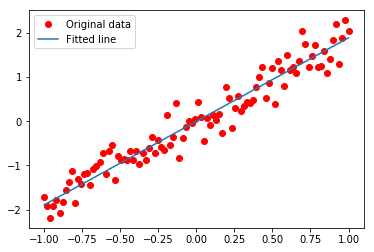

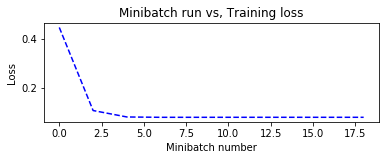

In [10]:
#初始化变量
init = tf.global_variables_initializer()
#参数设置
training_epochs = 20
display_step = 2

#启动会话
with tf.Session() as sess:
    sess.run(init)
    merged_summary_op = tf.summary.merge_all()  #合并所有summary
    summary_writer = tf.summary.FileWriter('log/mnist_with_summaries',sess.graph)
    
    #向模型中写入数据
    for epoch in range(training_epochs):
        for (x,y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X:x, Y:y})
            #生成summary
            summary_str = sess.run(merged_summary_op,feed_dict={X:x, Y:y});
            summary_writer.add_summary(summary_str, epoch); #将summary 写入文件

         #显示训练中的详细信息   
        if epoch % display_step == 0:
            loss = sess.run(cost, feed_dict={X:train_X, Y:train_Y})
            print("Epoch:", epoch+1, "cost=",loss,"W=",sess.run(W),"b=",sess.run(b))
            if not (loss == "NA"):
                plotdata["batchsize"].append(epoch)
                plotdata["loss"].append(loss)
    print("Finished!")
    print("cost=",sess.run(cost, feed_dict = {X:train_X, Y:train_Y}),"W=",sess.run(W),"b=",sess.run(b))
    print("cost:", cost.eval({X:train_X, Y: train_Y}))
    
    plt.plot(train_X, train_Y,'ro',label = 'Original data' )
    plt.plot(train_X, sess.run(W)*train_X+sess.run(b),label = 'Fitted line')
    plt.legend()
    plt.show()

    plotdata["avgloss"] = moving_average(plotdata["loss"])
    plt.figure(1)
    plt.subplot(211)
    plt.plot(plotdata["batchsize"],plotdata["avgloss"],'b--')
    plt.xlabel('Minibatch number')
    plt.ylabel('Loss')
    plt.title('Minibatch run vs, Training loss')
    plt.show()

In [28]:
#实例描述
tensorBoard --logdir E:\do you learn\log\mnist_with_summaries

### 6.数据读取与处理

In [1]:
#coding:utf-8
import tensorflow as tf

In [3]:
filename_queue = tf.train.string_input_producer(["E:/do you learn/MLdata/tf_read.csv"])

In [6]:
reader = tf.TextLineReader()

In [8]:
#获取队列值
key, value = reader.read(filename_queue)

In [11]:
record_defaults = [[1.],[1.],[1.],[1.]] 

In [12]:
col1,col2,col3,col4 = tf.decode_csv(value, record_defaults=record_defaults)

In [13]:
features = tf.stack([col1, col2, col3])

In [15]:
#初始化
init_op = tf.global_variables_initializer()
local_init_op = tf.local_variables_initializer()

In [16]:
#启动会话
with tf.Session() as sess:
    sess.run(init_op)
    sess.run(local_init_op)
    
    coord = tf.train.Coordinator()
    threads = tf.train.start_queue_runners(coord=coord)
    
    try:
        for i in range(30):
            example, label = sess.run([features, col4])
            print(example)
            
    except tf.errors.OutOfRangeError:
        print("Done!!!")
    finally:
        coord.request_stop()
        print('all threads are asked to stop!')
        coord.join(threads)
        print('all threads are stopped!')

Instructions for updating:
To construct input pipelines, use the `tf.data` module.
[  0.          7.5833335 130.49167  ]
[  0.         4.016667 303.05832 ]
[ 0. 10.  0.]
[0. 0. 0.]
[1.3834635e-02 4.0000000e+01 0.0000000e+00]
[612.2601   414.5       72.683334]
[478.89224 407.62167 260.80832]
[0. 4. 0.]
[0.9329427 0.        2.2638888]
[ 989.1136  443.95   2323.9834]
[0.    4.235 0.   ]
[ 0.       60.        2.338889]
[141.78596 390.      229.67778]
[ 0.        0.       25.786112]
[1.5950521e-02 6.2350001e+00 7.2813889e+01]
[95.1683  90.      71.34167]
[  0.       12.65    340.57224]
[236.35725 392.83334 243.78334]
[81.13818  61.816666 24.23611 ]
[915.9124  178.37167 430.8278 ]
[0. 0. 0.]
[  0.34716797  94.4        247.55      ]
[ 0. 90.  0.]
[ 0.       12.258333  0.      ]
[ 82.14144  65.88333 680.1528 ]
[ 63.39372 142.33333 447.7611 ]
[0. 0. 0.]
[ 0. 59.  0.]
[1531.5615  394.415   426.6722]
[316.3055  390.      510.42776]
all threads are asked to stop!
all threads are stopped!


### 7.图操作

In [18]:
#创建图的方法
c = tf.constant(0.0)

g = tf.Graph()
with  g.as_default():
    c1 = tf.constant(0.0)
    print(c1.graph)
    print(g)
    print(c.graph)

In [19]:
g2 = tf.get_default_graph()
print(g2)

In [20]:
tf.reset_default_graph()
g3 = tf.get_default_graph()
print(g3)

In [21]:
#获取tensor
print(c1.name)
t = g.get_tensor_by_name(name = "Const:0")
print(t)

Const:0
Tensor("Const:0", shape=(), dtype=float32)


In [22]:
#获取op
a = tf.constant([[1.0, 2.0]])
b = tf.constant([[1.0], [3.0]])

tensor1 = tf.matmul(a,b,name="exampleop")
print(tensor1.name, tensor1)
test = g3.get_tensor_by_name("exampleop:0")
print(test)

print(tensor1.op.name)
testop = g3.get_operation_by_name("exampleop")
print(testop)

with tf.Session() as sess:
    test = sess.run(test)
    print(test)
    test = tf.get_default_graph().get_tensor_by_name("exampleop:0")
    print(test)   

exampleop:0 Tensor("exampleop:0", shape=(1, 1), dtype=float32)
Tensor("exampleop:0", shape=(1, 1), dtype=float32)
exampleop
name: "exampleop"
op: "MatMul"
input: "Const"
input: "Const_1"
attr {
  key: "T"
  value {
    type: DT_FLOAT
  }
}
attr {
  key: "transpose_a"
  value {
    b: false
  }
}
attr {
  key: "transpose_b"
  value {
    b: false
  }
}

[[7.]]
Tensor("exampleop:0", shape=(1, 1), dtype=float32)


In [23]:
#获取所有列表
tt2 = g.get_operations()
print(tt2)

[<tf.Operation 'Const' type=Const>]


In [24]:
#获取对象
tt3 = g.as_graph_element(c1)
print(tt3)

Tensor("Const:0", shape=(), dtype=float32)


### 8.模型保存与使用

In [30]:
import tensorflow as tf
import os

#### 定义变量

In [31]:
x = tf.placeholder(tf.float32,[None, 784])

#定义参数
W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))

#定义激励函数
y = tf.nn.softmax(tf.matmul(x, W) + b)

#定义输出变量
y_ = tf.placeholder(tf.float32, [None, 10])

#定义成本函数
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))

#定义优化函数
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

#### 初始化

In [32]:
#初始化变量
init = tf.global_variables_initializer()

#定义会话
sess = tf.Session()

#### 运行session

In [33]:
#运行初始化
sess.run(init)

#定义模型保存对象
saver = tf.train.Saver()

#循环续联1000次
for i in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={x:batch_xs, y_ : batch_ys})
print("训练完成！")

训练完成！


#### 创建模型保存目录

In [34]:
#创建模型保存目录
model_dir = "E:/do you learn/MLdata/mnist_model"
model_name = "ckp"
if not os.path.exists(model_dir):
    os.mkdir(model_dir)

#### 保存模型

In [35]:
#保存模型
saver.save(sess, os.path.join(model_dir, model_name))
print("保存模型成功！")

保存模型成功！


#### 使用模型

In [ ]:
from tensorflow.examples.tutorials.mnist import input_data
#导入数据集
mnist = input_data.read_data_sets("MNIST_data",one_hot = True)

#### 创建会话

In [37]:
#创建会话
tf.reset_default_graph()
#创建会话
sess = tf.Session()

#### 定义变量

In [38]:
#定义输入变量
x = tf.placeholder(tf.float32, [None, 784])

#定义参数
W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))

#定义模型和激励函数
y = tf.nn.softmax(tf.matmul(x, W) + b)

#定义模型保存对象
saver = tf.train.Saver([W, b])

#### 恢复模型

In [49]:
saver.restore(sess, "E:/do you learn/MLdata/mnist_model/ckp")
print("恢复模型成功！")

#取出一个测试图片
idx = 123
img = mnist.test.images[idx]

INFO:tensorflow:Restoring parameters from E:/do you learn/MLdata/mnist_model/ckp
恢复模型成功！


#### 计算结果

In [50]:
#根据模型计算结果
ret = sess.run(y, feed_dict={x : img.reshape(1,784)})
print("计算模型结果成功！")

#显示测试结果
print("预测结果：%d" % (ret.argmax()))
print("实际结果：%d" % (mnist.test.labels[idx].argmax()))

计算模型结果成功！
预测结果：6
实际结果：6


### 9.线性回归--房价预测

In [1]:
#coding:utf-8
#导入库
from __future__ import print_function, division
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#导入数据
train = pd.read_csv("E:/do you learn/MLdata/bj_housing2.csv")

In [3]:
#定义参数
train = train[train['Area'] < 12000]

train_X = train['Area'].values.reshape(-1,1)[:100]
train_Y = train['Value'].values.reshape(-1,1)[:100]

In [4]:
#获得样本个数
n_samples = train_X.shape[0]

#定义参数，设置学习率
learning_rate = 0.05
#设置训练次数
training_epochs = 1000
#设置多少次显示一次
display_step = 10

In [5]:
#定义X,Y占位符
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

#使用Variable定义的学习参数
W = tf.Variable(np.random.randn(),name="weight",dtype=tf.float32)
b = tf.Variable(np.random.randn(),name="bias",dtype=tf.float32)

In [6]:
#构建正向传播结构
pred = tf.add(tf.multiply(W,X),b)

#损失函数
cost = tf.reduce_sum(tf.pow(pred-Y,2))/(2*n_samples)

#使用梯度下降优化器
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)

Epoch 0 	 Loss=7474 	 Model: y = 3.472x + 2.807
Epoch 10 	 Loss=4761 	 Model: y = 4.604x + 5.444
Epoch 20 	 Loss=4757 	 Model: y = 4.583x + 7.081
Epoch 30 	 Loss=4753 	 Model: y = 4.558x + 8.726
Epoch 40 	 Loss=4748 	 Model: y = 4.532x + 10.34
Epoch 50 	 Loss=4744 	 Model: y = 4.507x + 11.92
Epoch 60 	 Loss=4740 	 Model: y = 4.482x + 13.45
Epoch 70 	 Loss=4737 	 Model: y = 4.457x + 14.94
Epoch 80 	 Loss=4733 	 Model: y = 4.434x + 16.39
Epoch 90 	 Loss=4730 	 Model: y = 4.411x + 17.8
Epoch 100 	 Loss=4727 	 Model: y = 4.388x + 19.17
Epoch 110 	 Loss=4724 	 Model: y = 4.366x + 20.51
Epoch 120 	 Loss=4721 	 Model: y = 4.345x + 21.8
Epoch 130 	 Loss=4719 	 Model: y = 4.325x + 23.06
Epoch 140 	 Loss=4717 	 Model: y = 4.305x + 24.28
Epoch 150 	 Loss=4715 	 Model: y = 4.285x + 25.47
Epoch 160 	 Loss=4713 	 Model: y = 4.266x + 26.63
Epoch 170 	 Loss=4711 	 Model: y = 4.248x + 27.75
Epoch 180 	 Loss=4709 	 Model: y = 4.23x + 28.84
Epoch 190 	 Loss=4707 	 Model: y = 4.213x + 29.9
Epoch 200 	 Los

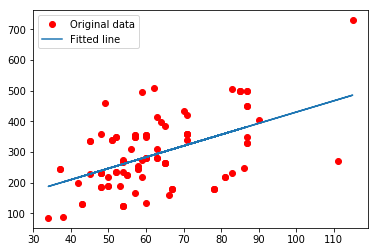

In [8]:
#初始化
#定义全局初始化
init = tf.global_variables_initializer()

#启动session，初始化变量
with tf.Session() as sess:
    sess.run(init)
#启动循环
    for epoch in range(training_epochs):

        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X:x ,Y:y})
        if epoch % display_step == 0:
            loss,w,t = sess.run([cost,W,b], feed_dict={X:train_X,Y:train_Y})
            log_str = "Epoch %d \t Loss=%.4g \t Model: y = %.4gx + %.4g"
            print(log_str % (epoch , loss, w ,t))

    print("优化完成！！！")

    #展示训练结果
    plt.plot(train_X,train_Y,'ro',label = "Original data")
    plt.plot(train_X,sess.run(W)*train_X+sess.run(b),label = "Fitted line")
    plt.legend()
    plt.show()

### 文本生成试验

In [36]:
import os
import collections
import numpy as np
import tensorflow as tf
import pickle

In [37]:
#步骤2 数据读取与标准化
#训练集的地址
path = "E:/do you learn/MLdata/"
#训练数据集名称
poetry_file = 'poetry.txt'
poetry_file = os.path.join(path, poetry_file)
#导入诗集
poetrys = []
with open(poetry_file,"r", encoding='UTF-8') as f:
    for line in f:
        try:
            #line = line.decode('UTF-8')
            line = line.strip(u'\n')
            title, content = line.strip(u' ').split(u':')
            content = content.replace(u' ',u'')
            if u'_' in content or u'('in content or u'（'in content or u'《'in content or u'['in content:
                continue
            if len(content) <5 or len(content) >79:
                continue
            content = u'[' + content + u']'
            poetrys.append(content)
        except Exception as e:
            pass
                              

In [38]:
poetrys = sorted(poetrys, key=lambda line: len(line))
print('唐诗总数：', len(poetrys))
print(poetrys[:100])

唐诗总数： 34646
['[长宜子孙。]', '[李下无蹊。]', '[罗钳吉网。]', '[常杂鲍帖。]', '[扬一益二。]', '[枫落吴江冷。]', '[人生分外愁。]', '[木末上明星。]', '[犬熟护邻房。]', '[兔子上金床。]', '[李下无蹊径。]', '[黄贼打黑贼。]', '[事长如事端。]', '[冬至长于岁。]', '[双陆无休势。]', '[謥洞入黄泉。]', '[古无门匠墓。]', '[太平平中元灾。]', '[卒客无卒主人。]', '[狐向窟嗥不祥。]', '[树稼，达官怕。]', '[雀啄江头黄柳花，]', '[共相呼唤醉归来。]', '[惟有高州是当家。]', '[今秋已约天台月。]', '[紫髯之伴有丹砂。]', '[黑衣神孙披天裳。]', '[不得登，登便倒。]', '[石榴花发石榴开。]', '[仿佛之间一倍杨。]', '[骑马来，骑马去。]', '[百年为市后为池。]', '[龟言市，蓍言水。]', '[崔冉郑，乱时政。]', '[麟之口，光庭手。]', '[若违教，值三豹。]', '[南金口，明府手。]', '[槐花黄，举子忙。]', '[买褚得薛不落节。]', '[大头杰，难杀人。]', '[龙门一半在闽川。]', '[军无媒，中道回。]', '[三公后，出死狗。]', '[百岁奴事三岁主。]', '[鸬鹚不打脚下塘。]', '[苦泉羊，洛水浆。]', '[生东吴，死丹徒。]', '[昭潭无底橘州浮。]', '[欲拔贫，诣徐闻。]', '[秋收稻，夏收头。]', '[无狐魅，不成村。]', '[一鸡死，一鸡鸣。]', '[侧堂堂，挠堂堂。]', '[杨柳杨柳漫头驼。]', '[张公吃酒李公醉。]', '[羊头山北作朝堂。]', '[圣人执节度金桥。]', '[逢儒则肉师必覆。]', '[东海鲤鱼飞上天。]', '[水行仙，怕秦川。]', '[骑马来，骑马去。]', '[鞭打马，马急走。]', '[待钱来，待钱来。]', '[青牛妪，曾避路。]', '[风荷珠露倾，惊起睡]', '[一两丝能得几时络。]', '[芫花半落，松风晚清。]', '[惭无窦建，愧作梁山。]', '[湛贲及第，彭伉落驴。]', '[汝虽打草，吾已惊蛇。]', '[焦湖百里，一任作獭。]', '[裴头黄尾，三求六李。]', '[太冲无兄，孝

In [39]:
#步骤3 数据预处理
#1、提取诗句中的字，并按统计值逆序排列
#统计每个字包括标点符号的出现次数
#每个诗句的字符都会存在all_words中
all_words = []
for poetry in poetrys:
    all_words += [word for word in poetry]
    
#每个字出现的次数
counter = collections.Counter(all_words)

#对上面结果的次数按降序排序
count_pairs = sorted(counter.items(), key = lambda x: -x[1])

#将字符按上面的顺序合并在一起
words,_ = zip(*count_pairs)

#取钱多少个常用字
words = words[:len(words)] + (' ',)
print(words[:20])

('，', '。', '[', ']', '不', '人', '山', '风', '日', '无', '一', '云', '花', '春', '来', '何', '水', '月', '上', '有')


In [40]:
#2、诗句转化成向量，将每个字映射一个ID，然后把每首诗句转化成由ID组成的向量
#每个字映射一个数据ID， dict类型
word_num_map = dict(zip(words, range(len(words))))

#定义lambda匿名函数，把每首诗映射为ID向量形式
to_num = lambda word: word_num_map.get(word, len(words))
poetrys_vector = [list(map(to_num, poetry)) for poetry in poetrys]
print(poetrys_vector[:10])

[[2, 28, 545, 104, 720, 1, 3], [2, 649, 48, 9, 2152, 1, 3], [2, 424, 4771, 2132, 1102, 1, 3], [2, 345, 1149, 2629, 2668, 1, 3], [2, 821, 10, 1367, 333, 1, 3], [2, 1196, 57, 430, 34, 438, 1, 3], [2, 5, 35, 140, 158, 105, 1, 3], [2, 292, 1462, 18, 56, 298, 1, 3], [2, 1139, 947, 1320, 522, 661, 1, 3], [2, 1365, 104, 18, 83, 583, 1, 3]]


In [41]:
#3、存储中间数据，方便以后直接读取
#保存所有数据，方便以后直接加在不用再次处理
all_file = 'E:/do you learn/MLdata/all.txt'
with open(all_file, 'wb') as fw:
    pickle.dump([words, word_num_map, poetrys_vector], fw)

In [42]:
#步骤4 准备minibatch 数据，每个minibatch的大小是64首诗
#每次取64首诗进行训练
batch_size = 64
n_chunk = len(poetrys_vector) // batch_size
print(n_chunk)

class DataSet(object):
    def __init__(self, data_size):
        self._data_size = data_size
        self._epochs_completed = 0
        self._index_in_epoch = 0
        self._data_index = np.arange(data_size)
        
    def next_batch(self, batch_size):
        start = self._index_in_epoch
        if start + batch_size > self._data_size:
            np.random.shuffle(self._data_index)
            self._epochs_completed = self._epochs_completed + 1
            self._index_in_epoch = batch_size
            full_batch_features, full_batch_labels = self.data_batch(0, batch_size)
            return full_batch_features,full_batch_labels
        else:
            self._index_in_epoch += batch_size
            end = self._index_in_epoch
            full_batch_features, full_batch_labels = self.data_batch(start, end)
            if self._index_in_epoch == self._data_size:
                self._index_in_epoch = 0
                self._epochs_completed = self._epochs_completed + 1
                np.random.shuffle(self._data_index)
            return full_batch_features, full_batch_labels
        
    def data_batch(self, start, end):
        batches = []
        for i in range(start, end):
            batches.append(poetrys_vector[self._data_index[i]])
                
        length = max(map(len, batches))
            
        xdata = np.full((end - start,length), word_num_map[' '], np.int32)
        for row in range(end - start):
            xdata[row,:len(batches[row])] = batches[row]
        ydata = np.copy(xdata)
        ydata[:,:-1] = xdata[:,1:]
        return xdata, ydata

541


In [49]:
#步骤5 定义网络结构
#定义RNN
def neural_network(model='lstm', rnn_size=128, num_layers=2):
    tf.reset_default_graph()
    #定义输入数据和输出目标
    input_data = tf.placeholder(tf.int32, [batch_size, None], name="inputs")
    output_targets = tf.placeholder(tf.int32, [batch_size, None], name="targets")
    #选择模型：传统RNN,GRU还是LSTM，默认LSTM
    if model == 'rnn':
        cell_fun = tf.contrib.rnn.BasicRNNCell
    elif model == 'gru':
        cell_funn = tf.contrib.rnn.GRUCell
    elif model == 'lstm':
        #定义一个LSTM结构
        cell_fun = tf.nn.rnn_cell.LSTMCell
        
    #创建2层RMM单元，每层有128个隐藏层节点
    cell = cell_fun(rnn_size, state_is_tuple = True)
    cell = tf.contrib.rnn.MultiRNNCell([cell]*num_layers, state_is_tuple = True)
    
    #提供了zero_state函数来生成全0的初始状态，batch_size设为64（每次取64首诗去训练）
    initial_state = cell.zero_state(batch_size, tf.float32)
    print(initial_state)
    
    #通过tf.variable_scope()制定作用域
    with tf.variable_scope('rnnlm'):
        #通过tf,get_variable创建变量
        softmax_w = tf.get_variable("softmax_w",[rnn_size, len(words)])
        softmax_b = tf.get_variable("softmax_b",[len(words)])
        
    #指定模型运行的具备设备，CPU或者GPU以及具体哪块
        with tf.device("/cpu:0"):
            #这里运用embedding 来将输入的不同词汇映射到隐藏层的神经元上
            embedding = tf.get_variable("embedding", [len(words), rnn_size])
            #tf.nn.embedding_lookup 的作用就是找到寻找的embedding中的对应的行的vector
            inputs = tf.nn.embedding_lookup(embedding, input_data)
        outputs, last_state = tf.nn.dynamic_rnn(cell, inputs, initial_state=initial_state, scope='rnnlm')
        output= tf.reshape(outputs, [-1, rnn_size])
        
        #给last_state一个名字，后面可以重新获取缓存
        last_state = tf.identity(last_state, name = "last_state")
        
        logits = tf.matmul(output, softmax_w) + softmax_b
        
        probs = tf.nn.softmax(logits, name= 'probs')
        return logits, last_state, probs, cell, initial_state, input_data,output_targets

In [50]:
#步骤6 加在模型并获取模型训练的epoch数
#set epoch
n_epoch = 10
#set display_step
display_step =10
def load_model(sess, saver, ckpt_path):
    latest_ckpt = tf.train.latest_checkpoint(ckpt_path)
    if latest_ckpt:
        print('resume from', latest_ckpt)
        saver.restore(sess, latest_ckpt)
        return int(latest_ckpt[latest_ckpt.index('-') + 1:])
    else:
        print('building model from stratch')
        sess.run(tf.global_variables_initializer())
        return -1

In [51]:
#步骤7 模型训练
model_path = "E:/do you learn/MLdata/Mode2"
model_name = 'E:/do you learn/MLdata/Mode2/poetry.module'
print(model_name,model_path)

E:/do you learn/MLdata/Mode2/poetry.module E:/do you learn/MLdata/Mode2


In [52]:
#训练
def train_neural_network():
    logits,last_state,_,_,_,input_data,output_targets = neural_network()
    targets = tf.reshape(output_targets, [-1])
    
    #定义损失函数
    loss = tf.contrib.legacy_seq2seq.sequence_loss_by_example([logits],[targets],[tf.ones_like(targets,dtype=tf.float32)],len(words))
    cost = tf.reduce_mean(loss)
    
    #定义学习速率
    learning_rate = tf.Variable(0.0, trainable=False)
    
    tvars = tf.trainable_variables()
    grads,_ = tf.clip_by_global_norm(tf.gradients(cost, tvars), 5)
    
    #定义优化器
    optimizer = tf.train.AdamOptimizer(learning_rate)
    
    #定义优化目标
    train_op = optimizer.apply_gradients(zip(grads, tvars))
    
    Session_config = tf.ConfigProto(allow_soft_placement= True)
    
    trainds = DataSet(len(poetrys_vector))
    
    #定义一个会话用于运行定义好的运算
    with tf.Session(config=Session_config) as sess:
        #指定设备
        with tf.device('/cpu:0'):
            #初始化所有变量
            sess.run(tf.initialize_all_variables())
            
            #创建saver，用户保存模型内容（checkpoint，变量，协议缓存等）
            saver = tf.train.Saver(tf.all_variables())
            
            #从最后一次保存的模型中获取已经训练的epoch数
            last_epoch = load_model(sess, saver, model_path)
            
            #最多训练100次epoch
            for epoch in range(last_epoch + 1,last_epoch + n_epoch + 1):
                #学习率随着epoch的增加而减小
                sess.run(tf.assign(learning_rate, 0.002*(0.97 ** epoch)))
                
                all_loss = 0.0
                
                for batche in range(n_chunk):
                    
                    #批量读取数据
                    x,y = trainds.next_batch(batch_size)
                    
                    #喂给模型数据和标签，返回训练的loss
                    train_loss, _ , _ = sess.run([cost,last_state,train_op],feed_dict={input_data:x,output_targets:y})
                    all_loss = all_loss + train_loss
                    if batche % display_step == 1:
                        print("batch: %d lr: %f batch loss: %f" % (batche, 0.002*(0.97 ** epoch),train_loss))
                        
                #保存该epoch的模型
                saver.save(sess, model_name, global_step =epoch)
                #打印平均loss
                print(epoch, 'Loss:', all_loss * 1.0 / n_chunk)
                        

In [53]:
train_neural_network()

(LSTMStateTuple(c=<tf.Tensor 'MultiRNNCellZeroState/LSTMCellZeroState/zeros:0' shape=(64, 128) dtype=float32>, h=<tf.Tensor 'MultiRNNCellZeroState/LSTMCellZeroState/zeros_1:0' shape=(64, 128) dtype=float32>), LSTMStateTuple(c=<tf.Tensor 'MultiRNNCellZeroState/LSTMCellZeroState_1/zeros:0' shape=(64, 128) dtype=float32>, h=<tf.Tensor 'MultiRNNCellZeroState/LSTMCellZeroState_1/zeros_1:0' shape=(64, 128) dtype=float32>))
building model from stratch
batch: 1 lr: 0.002000 batch loss: 8.710864
batch: 11 lr: 0.002000 batch loss: 7.405119
batch: 21 lr: 0.002000 batch loss: 6.084647
batch: 31 lr: 0.002000 batch loss: 6.275614
batch: 41 lr: 0.002000 batch loss: 6.408386
batch: 51 lr: 0.002000 batch loss: 6.364376
batch: 61 lr: 0.002000 batch loss: 6.319102
batch: 71 lr: 0.002000 batch loss: 6.352718
batch: 81 lr: 0.002000 batch loss: 6.328831
batch: 91 lr: 0.002000 batch loss: 6.325078
batch: 101 lr: 0.002000 batch loss: 6.295958
batch: 111 lr: 0.002000 batch loss: 6.340504
batch: 121 lr: 0.00200

batch: 101 lr: 0.001825 batch loss: 3.900985
batch: 111 lr: 0.001825 batch loss: 4.026754
batch: 121 lr: 0.001825 batch loss: 3.973413
batch: 131 lr: 0.001825 batch loss: 4.042424
batch: 141 lr: 0.001825 batch loss: 3.962329
batch: 151 lr: 0.001825 batch loss: 3.721862
batch: 161 lr: 0.001825 batch loss: 3.945596
batch: 171 lr: 0.001825 batch loss: 3.896581
batch: 181 lr: 0.001825 batch loss: 3.779395
batch: 191 lr: 0.001825 batch loss: 4.167929
batch: 201 lr: 0.001825 batch loss: 3.704430
batch: 211 lr: 0.001825 batch loss: 3.633461
batch: 221 lr: 0.001825 batch loss: 4.152802
batch: 231 lr: 0.001825 batch loss: 3.918566
batch: 241 lr: 0.001825 batch loss: 3.754186
batch: 251 lr: 0.001825 batch loss: 3.804837
batch: 261 lr: 0.001825 batch loss: 3.851962
batch: 271 lr: 0.001825 batch loss: 3.753469
batch: 281 lr: 0.001825 batch loss: 3.406885
batch: 291 lr: 0.001825 batch loss: 4.026240
batch: 301 lr: 0.001825 batch loss: 3.808788
batch: 311 lr: 0.001825 batch loss: 3.910321
batch: 321

batch: 301 lr: 0.001666 batch loss: 3.509949
batch: 311 lr: 0.001666 batch loss: 3.303804
batch: 321 lr: 0.001666 batch loss: 3.605449
batch: 331 lr: 0.001666 batch loss: 3.532298
batch: 341 lr: 0.001666 batch loss: 3.434152
batch: 351 lr: 0.001666 batch loss: 3.462884
batch: 361 lr: 0.001666 batch loss: 3.567231
batch: 371 lr: 0.001666 batch loss: 3.517572
batch: 381 lr: 0.001666 batch loss: 3.525352
batch: 391 lr: 0.001666 batch loss: 3.443858
batch: 401 lr: 0.001666 batch loss: 3.551879
batch: 411 lr: 0.001666 batch loss: 3.462679
batch: 421 lr: 0.001666 batch loss: 3.376527
batch: 431 lr: 0.001666 batch loss: 3.489218
batch: 441 lr: 0.001666 batch loss: 3.392538
batch: 451 lr: 0.001666 batch loss: 3.413327
batch: 461 lr: 0.001666 batch loss: 3.691482
batch: 471 lr: 0.001666 batch loss: 3.387469
batch: 481 lr: 0.001666 batch loss: 3.578764
batch: 491 lr: 0.001666 batch loss: 3.471795
batch: 501 lr: 0.001666 batch loss: 3.265812
batch: 511 lr: 0.001666 batch loss: 3.514295
batch: 521

batch: 491 lr: 0.001520 batch loss: 3.344358
batch: 501 lr: 0.001520 batch loss: 3.379225
batch: 511 lr: 0.001520 batch loss: 3.258059
batch: 521 lr: 0.001520 batch loss: 3.316700
batch: 531 lr: 0.001520 batch loss: 3.161911
9 Loss: 3.2640421156962565


In [54]:
#查看最后一次epoch训练的模型
model_file = tf.train.latest_checkpoint(model_path)
print(model_file)  

E:/do you learn/MLdata/Mode2/poetry.module-9


### 基于CNN的花类识别

In [1]:
import glob
import os
import cv2
import tensorflow as tf
from tensorflow.keras import layers ,optimizers, datasets ,Sequential
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [25]:
path = 'E:/do you learn/MLdata/flower_photos/'  #数据集地址

#缩放图片大小为100*100
w =100
h =100
c =3

#### 导入实验数据集

In [26]:
#步骤1  读取图片数据集函数
def read_img(path):
    cate = [path+x for x in os.listdir(path) if os.path.isdir(path+x)]
    imgs = []
    labels =[]
    for idx, folder in enumerate(cate):
        for im in glob.glob(folder+ '/*.jpg'):
            img = cv2.imread(im)
            img = cv2.resize(img,(w,h))
            imgs.append(img)
            labels.append(idx)
    return np.asarray(imgs, np.float32) , np.asarray(labels, np.int32)

In [27]:
#步骤2  读取图片数据集
#加载数据集
data, label = read_img(path)
print("shape of data:", data.shape)
print("shape of label:",label.shape)

shape of data: (3665, 100, 100, 3)
shape of label: (3665,)


In [28]:
#步骤3 划分训练集和测试集
seed = 785
np.random.seed(seed)

#切分数据集
(x_train, x_val, y_train, y_val) = train_test_split(data, label, test_size=0.20, random_state = seed)
x_train = x_train / 255
x_val = x_val / 255

#创建图像标签列表
flower_dict = {0:'dasiy', 1:'dandelion',2:'roses',3:'sunflowers',4:'tulips'}

#### 构建CNN图像识别模型

In [29]:
#步骤1 构建CNN神经网络
#创建模型
model = Sequential(
[   #一个卷积层，一个最大池化层，丢弃25%神经元
    layers.Conv2D(32, kernel_size=[5,5],padding="same",activation=tf.nn.relu),
    layers.MaxPool2D(pool_size=[2,2], strides=2, padding="same"),
    layers.Dropout(0.25),
    
    #继续添加两个卷积层和一个最大池化层
    layers.Conv2D(64, kernel_size=[3,3],padding="same",activation=tf.nn.relu),
    layers.Conv2D(64, kernel_size=[3,3],padding="same",activation=tf.nn.relu),
    layers.MaxPool2D(pool_size=[2,2], strides=2, padding="same"),
    layers.Dropout(0.25),
    
    #继续添加两个卷积层和一个最大池化层
    layers.Conv2D(128, kernel_size=[3,3],padding="same",activation=tf.nn.relu),
    layers.MaxPool2D(pool_size=[2,2], strides=2, padding="same"),
    layers.Dropout(0.25),
    
    #Flatten层用来将输入“压平”，即把多维的输入一维化
    layers.Flatten(),
    #调用layers.Dense()创建全连接层
    layers.Dense(512, activation=tf.nn.relu),
    layers.Dense(256, activation=tf.nn.relu),
    #添加全连接层，最后输出每个分类（5）的数值
    layers.Dense(5, activation='softmax')
])

In [30]:
#步骤2 构建优化器
#使用Adam优化器，优化模型参数
opt = optimizers.Adam(lr=0.0001)

#编译模型以供训练，metrics=['accuracy'] 即评估模型在训练和测试时的性能的指标
model.compile(optimizer=opt, loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

In [31]:
#步骤3 训练CNN图像识别模型
model.fit(x_train, y_train, epochs=20,validation_data=(x_val, y_val), batch_size=200, verbose=2)
# 输出模型的结构和参数
model.summary()

Train on 2932 samples, validate on 733 samples
Epoch 1/20
 - 130s - loss: 1.5633 - acc: 0.2858 - val_loss: 1.4671 - val_acc: 0.4147
Epoch 2/20
 - 125s - loss: 1.3531 - acc: 0.4499 - val_loss: 1.2271 - val_acc: 0.5102
Epoch 3/20
 - 140s - loss: 1.1857 - acc: 0.5113 - val_loss: 1.1708 - val_acc: 0.4952
Epoch 4/20
 - 148s - loss: 1.1248 - acc: 0.5263 - val_loss: 1.0974 - val_acc: 0.5321
Epoch 5/20
 - 130s - loss: 1.0748 - acc: 0.5634 - val_loss: 1.0967 - val_acc: 0.5525
Epoch 6/20
 - 129s - loss: 1.0355 - acc: 0.5825 - val_loss: 1.0901 - val_acc: 0.5553
Epoch 7/20
 - 134s - loss: 0.9967 - acc: 0.6033 - val_loss: 1.0404 - val_acc: 0.5757
Epoch 8/20
 - 133s - loss: 0.9706 - acc: 0.6139 - val_loss: 1.0461 - val_acc: 0.5907
Epoch 9/20
 - 131s - loss: 0.9485 - acc: 0.6265 - val_loss: 1.0425 - val_acc: 0.6044
Epoch 10/20
 - 129s - loss: 0.9356 - acc: 0.6320 - val_loss: 1.0895 - val_acc: 0.5798
Epoch 11/20
 - 2015s - loss: 0.8927 - acc: 0.6637 - val_loss: 1.0190 - val_acc: 0.5894
Epoch 12/20
 - 

In [32]:
model.save_weights('E:/do you learn/MLdata/Model/model.h5')

### 图像分类模型验证实验

#### 导入测试数据

In [33]:
#步骤2 设置初始环境
path_test = 'E:/do you learn/MLdata/TestImages/'

In [34]:
imgs = []
for im in glob.glob(path_test +'/*.jpg'):
    img = cv2.imread(im)
    img = cv2.resize(img, (w,h))
    imgs.append(img)
    
imgs = np.asarray(imgs, np.float32)

print("shape of data:", imgs.shape)

shape of data: (5, 100, 100, 3)


#### 模型验证

第 1 朵花预测：sunflowers


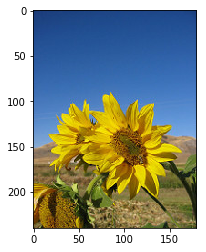

第 2 朵花预测：dasiy


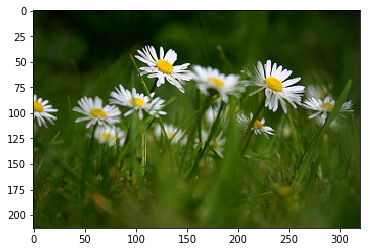

第 3 朵花预测：dasiy


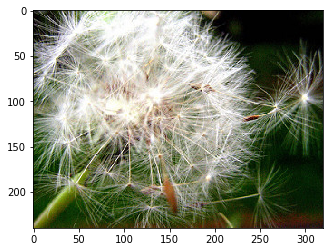

第 4 朵花预测：tulips


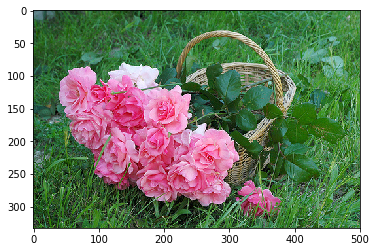

第 5 朵花预测：tulips


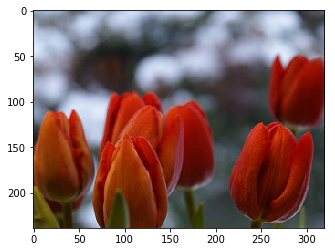

In [35]:
#步骤1 模型验证
#将图像导入模型进行预测
prediction = model.predict_classes(imgs)
#绘制预测图像
for i in range(np.size(prediction)):
    #打印没涨图像的预测结果
    print("第", i+1, "朵花预测："+flower_dict[prediction[i]])
    img = plt.imread(path_test + "test" + str(i+1) + ".jpg")
    plt.imshow(img)
    plt.show()